In [41]:
#importing libraries
import pandas as pd
import seaborn as sns 
import sqlalchemy as sal

In [4]:
df=pd.read_csv("Netflix_dataset.csv")

In [14]:
df.head
df.tail
df.shape
df.columns
df.size

85679

In [24]:
df.dtypes


Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [25]:
# to show index, column, datatype of each column, memory usage 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


### Handling duplicate rows

In [28]:
#find duplicae rows
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [32]:
#removing duplicate rows
df.drop_duplicates(inplace=True)

In [34]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


### null values

In [38]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

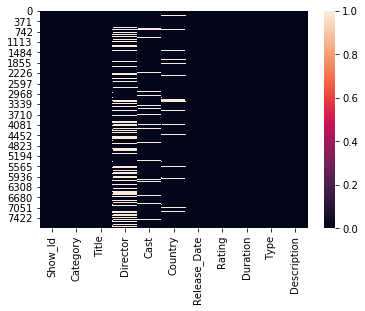

In [40]:
sns.heatmap(df.isnull())

Q.1 For "housecards" who is director and show_id?

In [48]:
#df[df["Title"].isin(['House of Cards'])]
df[df["Title"].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [59]:
# in which year highest no. of tv shows and movies were released and use graph
df['Release_year']=pd.to_datetime(df['Release_Date'])
df.head()
df.drop(columns=['Release_Date'],inplace=True)


KeyError: 'Release_Date'

In [ ]:
engine = sal.create_engine('mssql://LAPTOP-B1925F9K\SQLEXPRESS01/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()
df.to_sql('netflix', con=conn , index=False, if_exists = 'replace')

q.2 # in which year highest no. of tv shows and movies were released and use graph

In [61]:
df['Release_year'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Release_year, dtype: int64

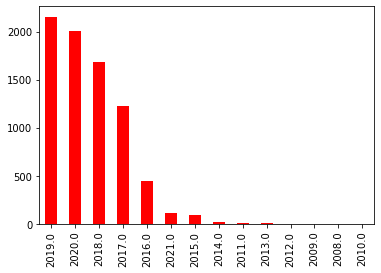

In [63]:
df['Release_year'].dt.year.value_counts().plot(kind= 'bar', color='red')

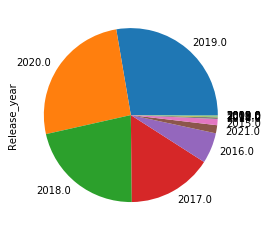

In [66]:
df['Release_year'].dt.year.value_counts().plot(kind= 'pie')

Q.3 count tv shows and movies

In [69]:
df.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

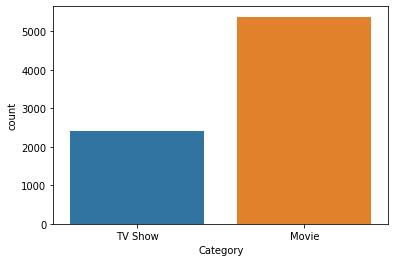

In [71]:
sns.countplot(df['Category'])

Q.4. SHOW MOVIES THAT WERE RELEASED IN 2000

In [76]:
df['year']=df['Release_year'].dt.year
df.head()
df[(df['Category'] == 'Movie') & (df['year']==2000)]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Release_year,year


Q.5 SHOW TITLE OF ALL TV SHOWS THAT WERE RELEASED IN INDIA

In [80]:
df.head(2)
df[(df['Category']=='TV Show')&(df['Country']=='India')]
df[(df['Category']=='TV Show')&(df['Country']=='India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

Q.6. TOP 10 DIRECTORS WHO GAVE MOST TV SHOWS AND MOVIES

In [86]:
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: Director, dtype: int64

    Q.7. RECORD WHERE CATEGORY IS MOVIE, TYPE IS COMEDIES, OR COUNTRY IS U.K.

In [89]:
df.tail()
df[(df['Category']=='Movie')&(df['Type']=='Comedies')|(df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Release_year,year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18,2020.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,2017.0


Q.8. IN HOW MANY MOVIES/SHOWS TOM CRUISE WAS CAST 

In [95]:
df[df['Cast']=='Tom Cruise'].shape[0]

0

Q.9. DIFFRENT RATINGS DEFINED NY NETFLIX

In [99]:
df.head(2)
df['Rating'].unique()
df['Rating'].nunique()

14

Q.10. HOW MANY MOVIES GOT RATING TV-14 IN CANADA

In [108]:
df.head(5)
df[(df['Category']=='Movie')&( df['Rating']=='TV-14')& (df['Country']=='Canada')].shape

(11, 12)

Q.11. HOW MANY TV SHOWS GOT RATING R AFTER YEAR 2018

In [113]:
df[(df["Rating"]=='R')&(df['Category']=='TV Show')&(df['year']>2018)]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Release_year,year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


Q.12 MAX. DURATION OFMOVIE/SHOW ON NETFLIX

In [125]:
df.head()
df['Duration'].unique
df[['min', 'unit']]=df['Duration'].str.split(" ",expand = True)


In [131]:
df.head(2)
df['min'].max()
df['min'].min()

'1'

Q.13 WHICH COUNTRY HAS HIGHEST NO. OF TV SHOWS

In [142]:
df.columns
tv_shows_by_country = df[df['Category'] == 'TV Show']
tv_shows_by_country.Country.value_counts().max()
tv_shows_by_country.Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

Q.14. SORT DATASET BY YEAR

In [148]:
df.sort_values(by='year',ascending=False)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Release_year,year,"(min, unit)",min,unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,86,min
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021-01-15,2021.0,1,1,Season
5955,s5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021-01-10,2021.0,162,162,min
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021-01-12,2021.0,81,81,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,NaN,2,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,NaN,3,3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,NaN,4,4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,NaN,13,13,Seasons


Q.15 INSTANCES WHERE CATEGORY IS MOVIE AND TYPE IS DRAMA OR CATEGORY IS TV SHOW AND TYPE IS KIDS TV

In [153]:
df[(df['Category'] == 'Movie') & (df['Type'] == 'Drama') | (df['Category'] == 'TV Show') & (df['Type'] == "Kids' TV")]


,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Release_year,year,"(min, unit)",min,unit
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020-10-01,2020.0,2,2,Seasons
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,2020.0,1,1,Season
434,s435,TV Show,Alphablocks,NaN,"Teresa Gallagher, David Holt, Lizzie Waterworth",United Kingdom,TV-Y,5 Seasons,Kids' TV,The letters of the alphabet come to life in Al...,2020-05-25,2020.0,5,5,Seasons
598,s599,TV Show,Ask the StoryBots,NaN,"Judy Greer, Erin Fitzgerald, Fred Tatasciore, ...",United States,TV-Y,3 Seasons,Kids' TV,Five curious little creatures track down the a...,2019-08-02,2019.0,3,3,Seasons
706,s707,TV Show,Bal Ganesh,Vijay S. Bhanushali,"Meghna Erande Joshi, Parminder Ghumman",NaN,TV-Y7,1 Season,Kids' TV,"Watch Ganesh destroy demons, disarm invaders a...",2020-03-31,2020.0,1,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017-06-16,2017.0,2,2,Seasons
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018-06-23,2018.0,1,1,Season
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018-06-07,2018.0,1,1,Season
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019-02-22,2019.0,2,2,Seasons
